# Temperature normalization 
In deep learning it is important to perform normalization on model's input.
First of all, normalization is crucial for a deep learning model to converge faster.

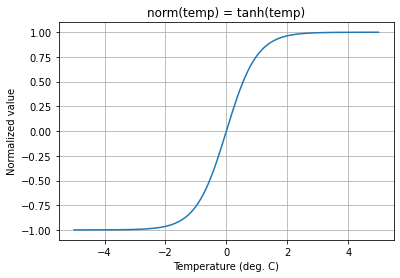

In [80]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

t = np.arange(-5, 5, 0.01)
tanh = np.tanh(t)

fig, ax = plt.subplots()
ax.plot(t, tanh)

ax.set(xlabel='Temperature (deg. C)', ylabel='Normalized value',
       title='norm(temp) = tanh(temp)')
ax.grid()
plt.show()

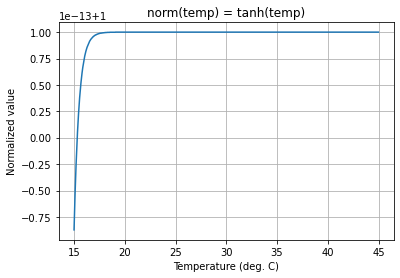

In [26]:
t = np.arange(15, 45, 0.01)
tanh = np.tanh(t)

fig, ax = plt.subplots()
ax.plot(t, tanh)

ax.set(xlabel='Temperature (deg. C)', ylabel='Normalized value',
       title='norm(temp) = tanh(temp)')
ax.grid()
plt.show()

But we can shift tanh and change its inclination so that it's suitable to normalize our data. We can do that by tuning a and b in equation below:
\begin{equation*}
t = temp
\end{equation*}
\begin{equation*}
norm(t) = tanh(a(t - b))
\end{equation*}

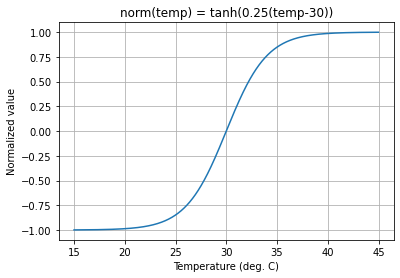

In [29]:
t = np.arange(15, 45, 0.01)
b = 30
a = 1/4
tanh =  np.tanh(a * (t - b))

fig, ax = plt.subplots()
ax.plot(t, tanh)

ax.set(xlabel='Temperature (deg. C)', ylabel='Normalized value',
       title='norm(temp) = tanh({}(temp-{}))'.format(a,b))
ax.grid()
plt.show()

Now let's tune a and b.
Let's assume that we expect temperatures between 20 and 40 degrees and avg. temperature of human body is 30.
We want our norm function to maintain constant "inclination" in this range. We will now calculate derivative of our norm function.


In [78]:
from mpmath import sech 
a_c = np.array([1/5, 1/10, 1/15, 1/20])
t_c = np.arange(20, 45, 5)
b=30

def compute_derivative_at_t(t, a, b):
    hyp = float(sech(a*(t-b)))
    return a*hyp*hyp

for a_ in a_c:
    for t_ in t_c:
        print("a = {:.2f}: norm({:.2f}) = {:.2f} and norm'({:.2f}) = {:.2f}".format(a_, t_, np.tanh(a_*(t_-b)), t_, compute_derivative_at_t(t_, a_, b)))
    print(" ")

a = 0.20: norm(20.00) = -0.96 and norm'(20.00) = 0.01
a = 0.20: norm(25.00) = -0.76 and norm'(25.00) = 0.08
a = 0.20: norm(30.00) = 0.00 and norm'(30.00) = 0.20
a = 0.20: norm(35.00) = 0.76 and norm'(35.00) = 0.08
a = 0.20: norm(40.00) = 0.96 and norm'(40.00) = 0.01
 
a = 0.10: norm(20.00) = -0.76 and norm'(20.00) = 0.04
a = 0.10: norm(25.00) = -0.46 and norm'(25.00) = 0.08
a = 0.10: norm(30.00) = 0.00 and norm'(30.00) = 0.10
a = 0.10: norm(35.00) = 0.46 and norm'(35.00) = 0.08
a = 0.10: norm(40.00) = 0.76 and norm'(40.00) = 0.04
 
a = 0.07: norm(20.00) = -0.58 and norm'(20.00) = 0.04
a = 0.07: norm(25.00) = -0.32 and norm'(25.00) = 0.06
a = 0.07: norm(30.00) = 0.00 and norm'(30.00) = 0.07
a = 0.07: norm(35.00) = 0.32 and norm'(35.00) = 0.06
a = 0.07: norm(40.00) = 0.58 and norm'(40.00) = 0.04
 
a = 0.05: norm(20.00) = -0.46 and norm'(20.00) = 0.04
a = 0.05: norm(25.00) = -0.24 and norm'(25.00) = 0.05
a = 0.05: norm(30.00) = 0.00 and norm'(30.00) = 0.05
a = 0.05: norm(35.00) = 0.24 and

We can see that the smaller the values of a are the more similar inclination of our norm function is for different values in range from 20 to 40 deg. C. However, this is at the cost of loosing "normality" of the resulting data.
In other words, our value of a is a trade-off between normality and linearity. 

In [2]:
t = np.arange(0, 60, 0.01)
b = 30
a = 1/10
tanh =  np.tanh(a * (t - b))

fig, ax = plt.subplots()
ax.plot(t, tanh)

ax.set(xlabel='Temperature (deg. C)', ylabel='Normalized value',
       title='norm(temp) = tanh({:.2f}(temp-{}))'.format(a,b))
ax.grid()
plt.show()

NameError: name 'np' is not defined